In [14]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
import datetime
import locale
import math 
import re   
import operator
from collections import Counter
import json
from nltk import ngrams
import operator
from itertools import islice
import string 
from tabulate import tabulate

In [2]:
with open('data/hora20.json') as data_file:    
    data = json.load(data_file)

## Cantidad total de podcasts

In [3]:
len(data)

670

# Frecuencia de podcasts

## Cantidad de podcasts mensuales 

In [4]:
df = pd.read_json('data/hora20.json', orient='index')

#### Line graph

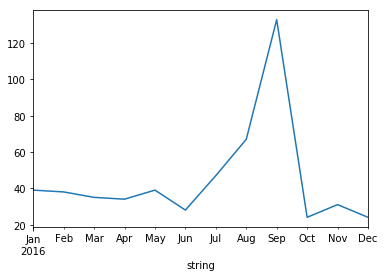

In [6]:
times = df.string.apply(lambda x: datetime.datetime.strptime(str(x)[:-2], "%Y%m%d") if str(x)[:-2] is not 'n' else None)
dt_ndx = pd.DatetimeIndex(times)
sr = pd.Series([1] * len(dt_ndx), index=dt_ndx)
monthly_count = sr.resample('1M').apply('sum')
monthly_count = monthly_count.iloc[-12:]
monthly_count.plot()

#### Tabla con los datos de cada mes: La fecha da el último día del mes pero los datos son del mes completo. 

In [7]:
monthly_count.sort_values(ascending = False, inplace=True)
mf = monthly_count.to_frame()
mf.columns = ['Number of podcasts']
mf.index.names = ['Month']
mf

,Number of podcasts
Month,
2016-09-30,133
2016-08-31,67
2016-07-31,47
2016-05-31,39
2016-01-31,39
2016-02-29,38
2016-03-31,35
2016-04-30,34
2016-11-30,31


#### Pie chart de porcientos mensuales. 

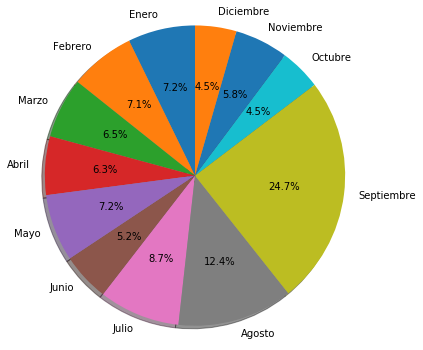

In [8]:
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)

mf = mf.reset_index()
mf.sort_values(by='Month',ascending = True, inplace=True)
labels = ['Enero', 'Febrero', 'Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre', 'Noviembre', 'Diciembre']
sizes = mf['Number of podcasts'].values
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

# Topics

## 25 Temas generales más abordados

###### Estas estadísticas salen del tema general de cada programa. VoiceBase da a cada trasncripción 1 o 2 temas generales, además de los temas específicos que se trataron en cada texto cuyo análisis está debajo. 

In [15]:
topics = {}
for t in df['general_topics']:
    for j in t:
        if j not in topics:
            topics[j] = 1
        else:
            topics[j] = topics[j] + 1
sorted_dict = sorted(topics.items(), key=operator.itemgetter(1), reverse=True)

print(tabulate(list(islice(sorted_dict, 25)), ['Tema', 'Cantidad de podcasts']))

Tema                       Cantidad de podcasts
-----------------------  ----------------------
Derecho                                      63
Derechos                                     33
Funcionarios                                 33
Justicia                                     24
Policía                                      22
Terminología filosófica                      18
Estado                                       16
Ciencia                                      13
Política                                     13
Sociología                                   13
Comunidad                                    12
Economía                                     12
Ocupaciones                                   9
Ciencia política                              9
Sociología política                           9
Términos                                      9
Gobierno                                      9
Derecho constitucional                        8
Términos jurídicos                      

## 50 Temas ampliados

In [16]:
temas = {}
for t in df['topics']:
    for key in t.keys():
        if key not in temas:
            temas[key] = 1
        else:
            temas[key] = temas[key] + 1
sorted_dict1 = sorted(temas.items(), key=operator.itemgetter(1), reverse=True)
print(tabulate(list(islice(sorted_dict1, 50)), ['Temas', 'Cantidad de podcasts']))
        

Temas                           Cantidad de podcasts
----------------------------  ----------------------
Ciencia política                                 491
Derecho constitucional                           472
Terminología filosófica                          454
Gobierno                                         431
Poder ejecutivo                                  419
Términos jurídicos                               402
Funcionarios administrativos                     402
Instituciones                                    393
Sociología política                              383
Términos de geografía                            379
Mercadotecnia                                    374
Guerra                                           366
Comunicación                                     363
Sociología de la cultura                         359
Derecho                                          338
Terminología económica                           336
Política                                      

# Natural Language Processing

In [17]:
def stopWordsInGrams(grams):    
    count = 0
    for w in grams:
        if w in stop_words_spanish:
            count = count + 1                
    return count/len(grams)  

def isNumber(s):
    try: 
        int(s)
        float(s)
        return True
    except ValueError:
        return False

def getNGram(text, n, stop_words, m):
    text = text.lower()
    ngramas = ngrams(text.split(), n)
    h_dict = {}   
    for grams in ngramas:
        if stopWordsInGrams(grams) > 0.34:
            continue
        words = ' '.join(grams)        
        words = words.lower() 
        words = ''.join(e for e in words if e.isalnum() or e == ' ')    
        words = words.strip()  
        if  words in stop_words or words in punct_signs or words == '' or words in abc or isNumber(words) or len(words.split(' ')) != n:
             continue
        if words in h_dict:
            h_dict[words] = h_dict[words] + 1
        else: 
            h_dict[words] = 1 
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    if m is -1:
        return list(sorted_dict)
    else:
        return list(islice(sorted_dict, m))

In [116]:
stop_words_spanish = ['un', 'una', 'unas', 'unos', 'uno', 'sobre', 'todo', 'también', 'tras', 'otro', 'algún', 'alguno', 'alguna', 'algunos', 'algunas', 'ser', 'es', 'soy', 'eres', 'somos', 'sois', 'estoy', 'esta', 'estamos', 'estais', 'estan', 'como', 'en', 'para', 'atras', 'porque', 'por qué',  'estaba', 'ante', 'antes', 'siendo', 'ambos', 'pero', 'por', 'poder', 'puede', 'puedo', 'podemos', 'podeis', 'pueden', 'fui', 'fue', 'fuimos', 'fueron', 'hacer', 'hago', 'hace', 'hacemos', 'haceis', 'hacen', 'cada', 'fin', 'incluso', 'primero', 'desde', 'conseguir', 'consigo', 'consigue', 'consigues', 'conseguimos', 'consiguen', 'ir', 'voy', 'va', 'vamos', 'vais', 'van', 'vaya', 'gueno', 'ha', 'tener', 'tengo', 'tiene', 'tenemos', 'teneis', 'tienen', 'el', 'la', 'lo', 'las', 'los', 'su', 'aqui', 'mio', 'tuyo', 'ellos', 'ellas', 'nos', 'nosotros', 'vosotros', 'vosotras', 'si', 'dentro', 'solo', 'solamente', 'saber', 'sabes', 'sabe', 'sabemos', 'sabeis', 'saben', 'ultimo', 'largo', 'bastante', 'haces', 'muchos', 'aquellos', 'aquellas', 'sus', 'entonces', 'tiempo', 'verdad', 'verdadero', 'verdadera', 'cierto', 'ciertos', 'cierta', 'ciertas', 'intentar', 'intento', 'intenta', 'intentas', 'intentamos', 'intentais', 'intentan', 'dos', 'bajo', 'arriba', 'encima', 'usar', 'uso', 'usas', 'usa', 'usamos', 'usais', 'usan', 'emplear', 'empleo', 'empleas', 'emplean', 'ampleamos', 'empleais', 'valor', 'muy', 'era', 'eras', 'eramos', 'eran', 'modo', 'bien', 'cual', 'cuando', 'donde', 'mientras', 'quien', 'con', 'entre', 'sin', 'trabajo', 'trabajar', 'trabajas', 'trabaja', 'trabajamos', 'trabajais', 'trabajan', 'podria', 'podrias', 'podriamos', 'podrian', 'podriais', 'yo', 'aquel', 'a', 'en', 'de', 'para', 'por', 'según', 'sin', 'sobre', 'tras', 'bajo', 'contra', 'hacia', 'hasta', 'rt', 'que', 'se', 'no', 'del', 'al', 'http', 'https', 'y', 'más', 'todos', 'año', 'será', 'este', 'vía', 'les', 'ni', 'dice', 'le', 'está', 'qué', 'hay', 'htt', 'quiere', 'nuestra', 'sí', 'of', 'in', 'años', 'firma' , 'firman', 'nuevo', 'hoy', 'ayer', 'inicio', 'ya', 'día','son', 'final', 'and', 'with', 'you', 'mundo', 'gran', 'sol', 'recibe', 'millones',  'gracias', 'hermana', 'fuego', 'me', 'eso',  'we', 'after', 'camino', 'dijo', 'caminos', 'recibirá', 'entiendo', 'mejores', 'mejor', 'deseos', 'lleve', 'nuevamente', 'ahora', 'definitiva', 'ese', 'definitivo', 'han', 'sino', 'tal', 'mismos', 'estos', 'así', 'ver', 'esto', 'esta', 'sido', 'manera', 'sigo', 'da', 'esa', 'aunque', 'están', 'mil', 'además', 'había', 'él', 'después', 'pues', 'vez', 'quienes', 'ms', 'tambin', 'pas', 'estn', 'aos', 'aqu', 'fonts total', 'table contains', 'font table', 'contains 2' , 'command is' ,'2 fonts', 'info command' ,'comment info' ,  'total authors', 'is null ', 'authors comment', 'est', 'tres', 'cinco', 'minuto', 'mucho', 'as', 'mucho ms' , 'o sea','cuatro' ,'com co']

abc = string.ascii_lowercase 
punct_signs = string.punctuation

## Top 20 Unigramas más frecuentes 

In [112]:
file = open('data/texts/txt/full_text.txt', 'r')
data = file.read() 
file.close()

In [113]:
final1 = getNGram(data, 1, stop_words_spanish, 20)
print(tabulate(final1, ['Ngram', 'Number']))

Ngram         Number
----------  --------
gobierno        6837
tema            6791
colombia        6550
creo            6324
acuerdo         6150
proceso         6099
presidente      5602
paz             5424
ciento          5383
minutos         4628
nacional        4125
parte           4047
decir           4006
personas        3890
farc            3718
otros           3599
momento         3593
noche           3576
estado          3547
cuatro          3520


## Top 20 Bigramas más frecuentes

In [117]:
final2 = getNGram(data, 2, stop_words_spanish, 20)
print(tabulate(final2, ['Ngram', 'Number'])) 

Ngram                   Number
--------------------  --------
estados unidos            2522
caracol radio             2037
buenas noches             1420
presidente santos          904
centro democrtico          839
corte constitucional       764
is null                    670
naciones unidas            559
corte suprema              546
juan manuel                537
manuel santos              522
gobierno nacional          516
reforma tributaria         415
ltima hora                 413
juan carlos                401
derechos humanos           393
hillary clinton            367
otras cosas                357
hora veinte                351
otra cosa                  349


## Cantidad de menciones a Juan Manuel Santos 

##### Se incluye el término 'Santos' también pero es posible que se utilice sin referirse al presidente. Solo se cuenta las veces que aparece en letra inicial mayúscula 

In [77]:
import re
def extract_RegularExpression(text, regExp):
    mentions = []
    patron = re.compile(regExp)
    mentions = patron.findall(text)    
    mentions = [tuple(filter(None, x)) for x in mentions]
    mentions = [x[0] for x in mentions] 
    h_dict = {}
    for x in mentions:
        if x in h_dict:
            h_dict[x] = h_dict[x] + 1
        else:
            h_dict[x] = 1
    result = pd.DataFrame(list(h_dict.items()), columns=['Terms', 'Number'])
    result = result.set_index('Terms')
    result.loc['Total'] = result['Number'].sum()
    return result.reset_index()

In [79]:
santosRegExp = '(([pP]residente[ ]+)*([jJ]uan[ ]+[mM]anuel[ ]+[sS]antos))+|([pP]residente[ ]+[jJ]uan[ ]+[Mm]anuel)+|([pP]residente[ ]+[sS]antos)+|(Santos)+'
extract_RegularExpression(data, santosRegExp)


,Terms,Number
0,presidente Juan Manuel santos,301
1,Presidente Juan Manuel santos,9
2,presidente santos,808
3,presidente Juan Manuel,1
4,Presidente santos,102
5,Juan Manuel santos,183
6,Santos,5
7,Total,1409


## 20  Unigramas más frecuentes en la misma oración que 'Santos'

In [121]:
def getNGramasFrecuencyBySentence(sentences, regExp, term, n, m, lower):
    regexpComp = re.compile(regExp)
    data_term = ''
    for s in sentences: 
        if regexpComp.search(s.lower() if lower == True else s): 
            data_term = data_term + '\n' + s

    stop_words = stop_words_spanish
    stop_words.append(term)
    finalTerm = getNGram(data_term, n,stop_words , m)
    print(tabulate(finalTerm, ['Ngram', 'Number']))

In [125]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]santos[\n .,;\'\"]', 'santos', 1, 20, False)

Ngram         Number
----------  --------
presidente      1914
paz              978
gobierno         882
juan             640
acuerdo          613
colombia         596
proceso          571
manuel           543
farc             501
minutos          500
tema             477
creo             408
nacional         398
noche            356
ciento           324
parte            323
uribe            307
general          306
plebiscito       294
acuerdos         279


## Bigramas más frecuentes en la misma oración que 'Santos'

In [126]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]santos[\n .,;\'\"]', 'santos', 2, 20, False)

Ngram                   Number
--------------------  --------
juan manuel                495
presidente juan            309
manuel santos              237
estados unidos             170
presidente santos          166
caracol radio              131
buenas noches              116
centro democrtico          106
naciones unidas             79
corte constitucional        76
lvaro uribe                 75
gobierno nacional           61
is null                     56
presidente uribe            53
reforma tributaria          47
premio nobel                46
derechos humanos            43
corte suprema               41
ex presidente               40
plan colombia               40


## Cantidad de menciones a Álvaro Uribe

In [83]:
extract_RegularExpression(data, '([áÁ]lvaro[ ]+[uU]ribe[ ]+[vV]élez)+|([áÁ]lvaro[ ]+[uU]ribe)+|([uU]ribe)+|([uU]ribe[ ]+[vV]élez)')

,Terms,Number
0,Álvaro Uribe,2
1,Uribe,1280
2,Total,1282


## Unigramas más frecuentes en la misma oración que 'Uribe'

In [127]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]Uribe[\n .,;\'\"]', 'uribe', 1, 20, False)

Ngram           Number
------------  --------
presidente         752
gobierno           461
acuerdo            421
paz                420
proceso            347
lvaro              328
farc               295
creo               294
tema               280
centro             267
democrtico         225
expresidente       222
minutos            215
justicia           208
colombia           200
corte              194
parece             191
caso               188
decir              188
nacional           179


## Bigramas más frecuentes en la misma oración que 'Uribe'

In [128]:
getNGramasFrecuencyBySentence(data.split('.'), r'[\n .,;\'\"]Uribe[\n .,;\'\"]', 'uribe', 2, 20, False)

Ngram                   Number
--------------------  --------
centro democrtico          192
expresidente lvaro          86
ex presidente               76
estados unidos              67
presidente lvaro            65
lvaro uribe                 60
presidente uribe            60
corte constitucional        54
senador lvaro               50
buenas noches               45
caracol radio               44
corte suprema               41
juan manuel                 41
acuerdo nacional            32
is null                     29
presidente juan             26
presidente santos           25
naciones unidas             24
santiago uribe              24
expresidente uribe          24


## Top 20 Nombres más mencionados

###### Se eliminaron las entradas de Santos e Uribe porque aparece el análisis en celdas anteriores. 

In [87]:
file  = open('../spanish_names.txt', 'r')  
spanish_names = file.readlines()
spanish_names = [s[:-1] for s in spanish_names]

In [88]:
def extractNamesAndEntities(text):
    i = 0
    hdict = {}
    patron = re.compile('(([A-ZÁÉÍÓÚÑÜ]{1}[a-zñáéíóúü]+)([ ]+de[ ]+la[ ]+)?([ ]+de[ ]+)?([ ]+del[ ]+)?([ ]*[A-ZÁÉÍÓÚÑÜ]{1}[a-zñáéíóúü]+)*)')
    names = patron.findall(text)
    names = [x[0] for x in names if x[0].lower() not in stop_words_spanish]
    for k in names:
        k = k.strip()
        for n in spanish_names:            
            if(n is not '' and (n + ' ' in k.upper() or ' ' + n in k.upper() or n == k.upper()) ):       
                if(k in hdict.keys()):
                    hdict[k] = hdict[k] + 1
                else:
                    hdict[k] = 1
                break
    return hdict

def printTopMNames(hdict, m):    
    sorted_dict = sorted(hdict.items(), key=operator.itemgetter(1), reverse=True)
    return list(islice(sorted_dict, m))

In [89]:
hdict = extractNamesAndEntities(data)
final = printTopMNames(hdict, 23)
del final[0]
del final[1]
del final[15]
print(tabulate(final, ['Name', 'Number']))

Name            Number
------------  --------
Diana              378
Israel             299
Carlos             276
Obama              264
Francisco          254
Javier             252
Rodrigo            227
Florida            204
Jorge              194
Orlando            188
Juan               184
Alejandro          180
Fernando           179
Nueva York         179
Santiago           169
Rafael             160
Barack Obama       150
Casa Blanca        140
Juan Carlos        137
Miguel             131


## Top 20 Unigramas en la misma oración que 'Paz'

In [129]:
sentences = data.split('.')
regexp = re.compile(r'[ .,;\'\"]paz[ .,;\'\"]')
data_paz = ''
for s in sentences: 
    if regexp.search(s.lower()): 
        data_paz = data_paz + '\n' + s

stop_words = stop_words_spanish
stop_words.append('paz')
final2 = getNGram(data_paz, 1,stop_words , 20)
print(tabulate(final2, ['Ngram', 'Number']))

Ngram         Number
----------  --------
proceso         2005
acuerdo         1887
gobierno        1543
presidente      1463
farc            1388
colombia        1276
tema            1110
creo             998
acuerdos         860
plebiscito       774
justicia         708
congreso         678
minutos          670
decir            629
conflicto        619
nacional         613
parte            604
poltica          601
corte            534
parece           515


## Top 20 Bigramas en la misma oración que 'Paz'

In [130]:
final2 = getNGram(data_paz, 2,stop_words , 20)
print(tabulate(final2, ['Ngram', 'Number']))

Ngram                    Number
---------------------  --------
estados unidos              262
buenas noches               237
centro democrtico           234
caracol radio               224
corte constitucional        204
juan manuel                 200
naciones unidas             149
presidente juan             142
justicia transicional       113
is null                     100
manuel santos                96
gobierno nacional            91
jurisdiccin especial         87
corte suprema                81
conflicto armado             80
acto legislativo             79
premio nobel                 78
fernando cristo              76
reforma tributaria           74
derechos humanos             73


## Top 20 Unigramas en la misma oración que 'farc'

In [131]:
sentences = data.split('.')
regexp = re.compile(r'[ .,;\'\"]farc[ .,;\'\"]')
data_farc = ''
for s in sentences: 
    if regexp.search(s.lower()): 
        data_farc = data_farc + '\n' + s

stop_words = stop_words_spanish
stop_words.append('farc')
final8 = getNGram(data_farc, 1,stop_words , 20)
print(tabulate(final8, ['Ngram', 'Number']))

Ngram         Number
----------  --------
acuerdo         1605
gobierno        1322
proceso         1192
presidente       883
creo             827
tema             790
colombia         706
acuerdos         615
parte            586
poltica          498
decir            496
parece           486
estado           449
justicia         439
conflicto        439
congreso         430
minutos          420
momento          415
armas            407
guerrilla        405


## Top 20 Bigramas en la misma oración que 'farc'

In [132]:
final9 = getNGram(data_farc, 2,stop_words , 20)
print(tabulate(final9, ['Ngram', 'Number']))

Ngram                    Number
---------------------  --------
naciones unidas             183
centro democrtico           173
estados unidos              170
caracol radio               128
buenas noches               121
corte constitucional        113
fuerza pblica                99
juan manuel                  94
justicia transicional        75
gobierno nacional            74
presidente juan              65
is null                      64
conflicto armado             56
otras cosas                  51
acto legislativo             50
fuerzas militares            49
cese bilateral               47
corte suprema                43
jurisdiccin especial         42
pos conflicto                41


## Top 20 Unigramas en la misma oración que 'Estado'

In [133]:
sentences = data.split('.')
regexp = re.compile(r'[ .,;\'\"]estado[ .,;\'\"]')
data_estado = ''
for s in sentences: 
    if regexp.search(s.lower()): 
        data_estado = data_estado + '\n' + s

stop_words = stop_words_spanish
stop_words.append('estado')
final3 = getNGram(data_estado, 1,stop_words , 20)
print(tabulate(final3, ['Ngram', 'Number']))

Ngram         Number
----------  --------
gobierno         930
tema             882
creo             776
presidente       714
proceso          701
colombia         680
acuerdo          661
parte            540
estados          489
caso             476
personas         476
decir            463
justicia         457
consejo          449
poltica          444
ciento           434
nacional         429
digamos          421
minutos          420
parece           412


## Top 20 Bigramas en la misma oración que 'Estado'

In [134]:
final4 = getNGram(data_estado, 2,stop_words , 20)
print(tabulate(final4, ['Ngram', 'Number']))

Ngram                   Number
--------------------  --------
estados unidos             383
buenas noches              134
corte suprema              123
caracol radio              120
centro democrtico           82
corte constitucional        79
hillary clinton             77
is null                     72
derechos humanos            72
fuerza pblica               65
juan manuel                 63
naciones unidas             56
asamblea nacional           48
otra cosa                   46
reforma tributaria          46
gobierno nacional           43
otras cosas                 40
alejandro ordez             38
nicols maduro               38
juan carlos                 37


## Top 20 Fechas más mencionadas

In [96]:
def store_dates(regExp, text, datesDict):
    patron = re.compile(regExp)
    for m in patron.finditer(text):
        if m.group() in datesDict:
            datesDict[m.group()].append(m.start())
        else:
            datesDict[m.group()] = [m.start()]    
    return datesDict

def extract_dates(text, datesDict):
    regExp1 = '((primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1})) de (enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre|([0-9]{2}|[1-9]{1})) de ((mil|dos mil) (cien|doscientos|trescientos|cuatrocientos|quinientos|seiscientos|setecientos|ochocientos|novecientos)( dieci| veinti| treinta y| cuarenta y| cincuenta y| sesenta y| setenta y| ochenta y| noventa y)?( )?(uno|dos|tres|cuatro|cinco|seis|séis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince)|[0-9]{4}))'
    
    regExp2 = '(([0-9]{2}|[1-9]{1})[-/]([0-9]{2}|[1-9]{1})[-/]([0-9]{4}))'   
    
    regExp3 = '((enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)? (del|de|desde|desde el) (primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1}))( al )(primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1}))( de )?(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)?( de )?(((mil|dos mil) (cien|doscientos|trescientos|cuatrocientos|quinientos|seiscientos|setecientos|ochocientos|novecientos)( dieci| veinti| treinta y| cuarenta y| cincuenta y| sesenta y| setenta y| ochenta y| noventa y)?( )?(uno|dos|tres|cuatro|cinco|seis|séis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince))|[0-9]{4})?)'
                         
    regExp4 = '(((pasado|próximo|siguiente)( )+((lunes)|(martes)|(miércoles)|(jueves)|(viernes)|(sábado)|(domingo))( )+(primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1})))|(((lunes)|(martes)|(miércoles)|(jueves)|(viernes)|(sábado)|(domingo))( )+ (pasado|próximo|siguiente|(que( )+viene))))'
    
    regExp5 = '((enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre) (a|hasta) (enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)( )?(de|del)?( )?(((mil|dos mil) (cien|doscientos|trescientos|cuatrocientos|quinientos|seiscientos|setecientos|ochocientos|novecientos)( dieci| veinti| treinta y| cuarenta y| cincuenta y| sesenta y| setenta y| ochenta y| noventa y)?( )?(uno|dos|tres|cuatro|cinco|seis|séis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince))|([0-9]{4}))?)'
   
    regExp6 = '((((mil|dos mil) (cien|doscientos|trescientos|cuatrocientos|quinientos|seiscientos|setecientos|ochocientos|novecientos)( dieci| veinti| treinta y| cuarenta y| cincuenta y| sesenta y| setenta y| ochenta y| noventa y)?( )+(uno|dos|tres|cuatro|cinco|seis|séis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince))|([0-9]{4}))( )+(a|al)( )+(((dos mil|mil)( )+(cien|doscientos|trescientos|cuatrocientos|quinientos|seiscientos|setecientos|ochocientos|novecientos)?( )+(dieci| veinti|treinta y|cuarenta y|cincuenta y|sesenta y|setenta y|ochenta y|noventa y)?( )+(uno|dos|tres|cuatro|cinco|seis|séis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince))|([0-9]{4})))'
                         
    regExp7 = '((enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)( )+(primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1}))( (a)( )(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre) (primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1})))?)'
    
    regExp8 = '((primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1})) (de) (enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre) (al|hasta|hasta el) (primero|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciséis|diecisiete|dieciocho|diecinueve|veinte|veintiuno|vientidos|veintitres|veinticuatro|veinticinco|veintiséis|veintisiete|veintiocho|veintinueve|treinta|treinta y uno|([0-9]{2}|[1-9]{1})) (de) (enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre))'
         
    datesDict = store_dates(regExp1, text, datesDict)
    datesDict = store_dates(regExp2, text, datesDict)
    datesDict = store_dates(regExp3, text, datesDict)
    datesDict = store_dates(regExp4, text, datesDict)
    datesDict = store_dates(regExp5, text, datesDict)
    datesDict = store_dates(regExp6, text, datesDict)
    datesDict = store_dates(regExp7, text, datesDict)
    datesDict = store_dates(regExp8, text, datesDict)
    return datesDict

In [98]:
datesD = extract_dates(data.lower(), datesD)

In [99]:
newDict = {}
for key, value in datesD.items():
    newDict[key] = len(value)
result = pd.DataFrame(list(newDict.items()), columns=['Dates', 'Number'])
result = result.sort_values(by='Number', ascending=False)
result = result[:20]
result

,Dates,Number
87,diciembre dos,25
96,octubre dos,16
95,del primero al siete de febrero,15
117,noviembre dos,14
23,enero dos,14
132,abril dos,14
121,julio dos,12
156,del primero al treinta,11
113,mayo dos,8
12,septiembre dos,8


## Nombres mencionados cerca de las fechas más mencionadas. 

##### Se tomaron 1000 caracteres hacia atrás y 1000 hacia adelante a partir de la posición de la fecha encontrada. El tamaño de la ventana es de 2000. 

In [101]:
for key, value in datesD.items():
    if key not in result['Dates'].values:
        continue
    for x in value:
        start = 0 if x<1000 else x-1000
        end = len(data)-1 if ((x + 1000) > (len(data)-1)) else (x + 1000)
        windows_data = data[start:end] 
        namesdict = extractNamesAndEntities(windows_data)
    if len(namesdict) > 0: 
        print('\nDate: ', key)
        finalNames = printTopMNames(namesdict, 10)
        print(tabulate(finalNames, ['Name', 'Number']))


Date:  siete de marzo al primero de abril
Name                      Number
----------------------  --------
Julio Csar Ruiz Alfaro         1
Hugo                           1

Date:  enero dos
Name      Number
------  --------
Israel         1

Date:  veintinueve de septiembre al dos de octubre
Name                       Number
-----------------------  --------
Universidad del Rosario         2
Javier Prez                     1
Leticia Wood                    1
Jorge                           1
Francisco Richter               1

Date:  diciembre dos
Name                   Number
-------------------  --------
Oeste de Nueva York         1
Manuel                      1

Date:  junio dos
Name                    Number
--------------------  --------
Nueva York                   1
Luis Javier Mosquera         1
Alejandra Camacho            1
Santiago de Chile            1

Date:  octubre once
Name                       Number
-----------------------  --------
Universidad del Rosario        